In [2]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/167.0 kB ? eta -:--:--
     -------------- ------------------------ 61.4/167.0 kB 3.2 MB/s eta 0:00:01
     -------------------------------- ----- 143.4/167.0 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 167.0/167.0 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.8 MB 1.7 MB/s eta 0:00:05
    --------------------------------------- 0.1/7.8 MB 1.8 MB/s eta 0:00:05
   - -------------------------------------- 0.2/7.8 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/7.8 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.4/7.8 MB 1.8 MB/s eta 0:00:05
   -- --

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt

In [8]:
!pip install scikit-learn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 60.8/60.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.6/11.0 MB 19.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/11.0 MB 20.5 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/11.0 MB 20.5 MB/s eta 0:00:01
   -------------- ------------------------- 4.1/11.0 MB 23.6 MB/s eta 0:00:01
   ------------------- -------------------- 5.5/11.0 MB 24.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 25.6 MB/s eta 0:00:01
   ------------------------------- -------- 8.6/11.0 MB 27.4 MB/s eta 0:00:01
   ----------------------------------- ---- 9.8/11.0 MB 27.1 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.0 MB 29.7 MB/s eta 0:00:

In [10]:
from sklearn.datasets import make_blobs,make_circles

In [11]:
from sklearn.svm import SVC

from sklearn.linear_model import Perceptron

from sklearn.preprocessing import StandardScaler

In [13]:
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=1.0)


In [17]:
X_nonlinear, y_nonlinear = make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)


In [19]:
#1. Linear Classifier vs SVM on Linearly Separable Data

#Linear Classifier (Perceptron)

linear_clf =Perceptron()

linear_clf.fit(X_linear, y_linear)


Perceptron()

In [20]:
#SVM with linear kernel

svm_linear = SVC(kernel='linear')

svm_linear.fit(X_linear, y_linear)


SVC(kernel='linear')

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot decision boundary
def plot_decision_boundary(X, y, clf, title):
    # Plotting the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker='o')

    plt.title(title)
    plt.show()


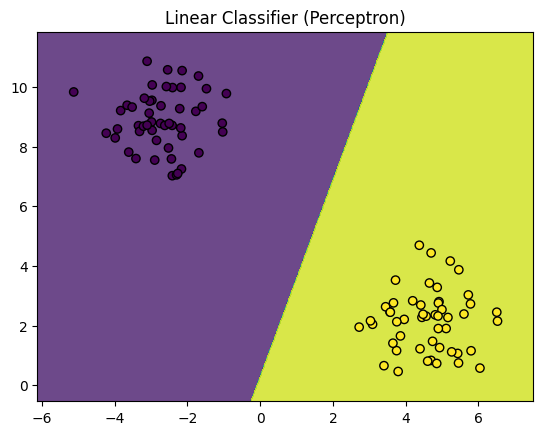

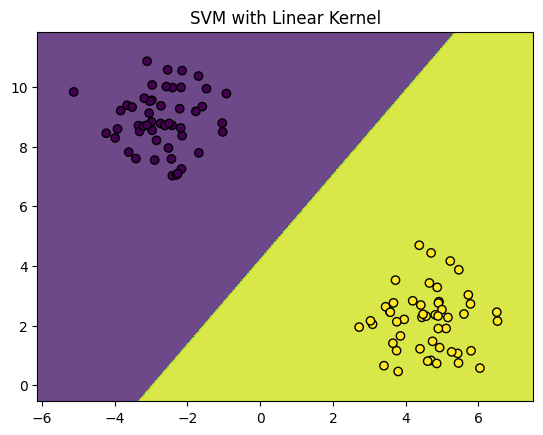

In [22]:
#Plotting for linearly separable data

plot_decision_boundary (X_linear, y_linear, linear_clf, "Linear Classifier (Perceptron)")

plot_decision_boundary (X_linear, y_linear, svm_linear, "SVM with Linear Kernel")


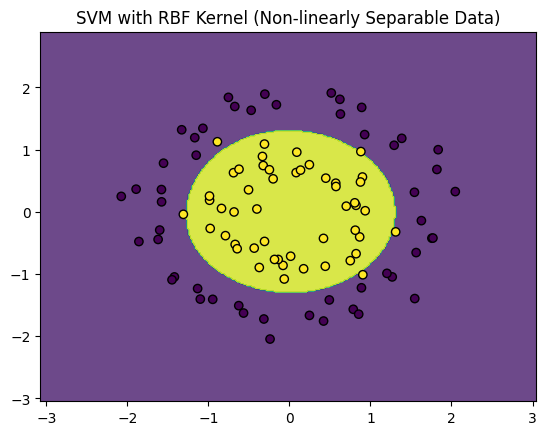

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 2. SVM with RBF kernel on Non-Linearly Separable Data

# Scaling the non-linear data
scaler = StandardScaler()
X_nonlinear_scaled = scaler.fit_transform(X_nonlinear)

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', gamma='auto')
svm_rbf.fit(X_nonlinear_scaled, y_nonlinear)

# Plotting for non-linearly separable data
plot_decision_boundary(X_nonlinear_scaled, y_nonlinear, svm_rbf, "SVM with RBF Kernel (Non-linearly Separable Data)")
